In [10]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [13]:
btc_df = pd.read_csv('../data/raw/coin_Bitcoin.csv')
eos_df = pd.read_csv('../data/raw/coin_EOS.csv')
sol_df = pd.read_csv('../data/raw/coin_Solana.csv')

btc_df.head(), eos_df.head(), sol_df.head()

(   SNo     Name Symbol                 Date        High         Low  \
 0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
 1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
 2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
 3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
 4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   
 
          Open       Close  Volume     Marketcap  
 0  134.444000  144.539993     0.0  1.603769e+09  
 1  144.000000  139.000000     0.0  1.542813e+09  
 2  139.000000  116.989998     0.0  1.298955e+09  
 3  116.379997  105.209999     0.0  1.168517e+09  
 4  106.250000   97.750000     0.0  1.085995e+09  ,
    SNo Name Symbol                 Date     High       Low      Open    Close  \
 0    1  EOS    EOS  2017-07-02 23:59:59  2.87751  0.822648  0.996521  2.71005   
 1    2  EOS    EOS  2017-07-03 23:59:59  5.39597  2.632310  2.717390  4.08664   
 2    3  EOS 

In [ ]:
# Análise BitCoin

In [14]:
btc_df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [15]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

In [16]:
features = ['Open', 'High', 'Low', 'Volume', 'Marketcap']
target = 'Close'

# Separando as features (X) e o target (y)
X_btc = btc_df[features]
y_btc = btc_df[target]

In [17]:
from sklearn.model_selection import train_test_split

# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=42)

# Verificando as formas dos datasets resultantes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2392, 5) (599, 5) (2392,) (599,)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Instanciando
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliando modelo usando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE do modelo: {rmse}')


RMSE do modelo: 123.63832657769859


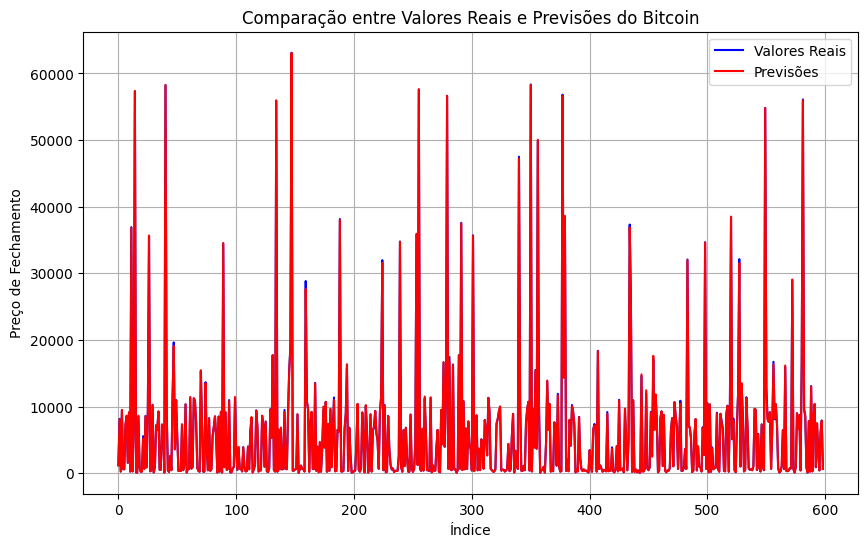

In [19]:
import matplotlib.pyplot as plt

# Plotaando previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais', color='blue')
plt.plot(y_pred, label='Previsões', color='red')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação entre Valores Reais e Previsões do Bitcoin')
plt.legend()
plt.grid(True)
plt.show()

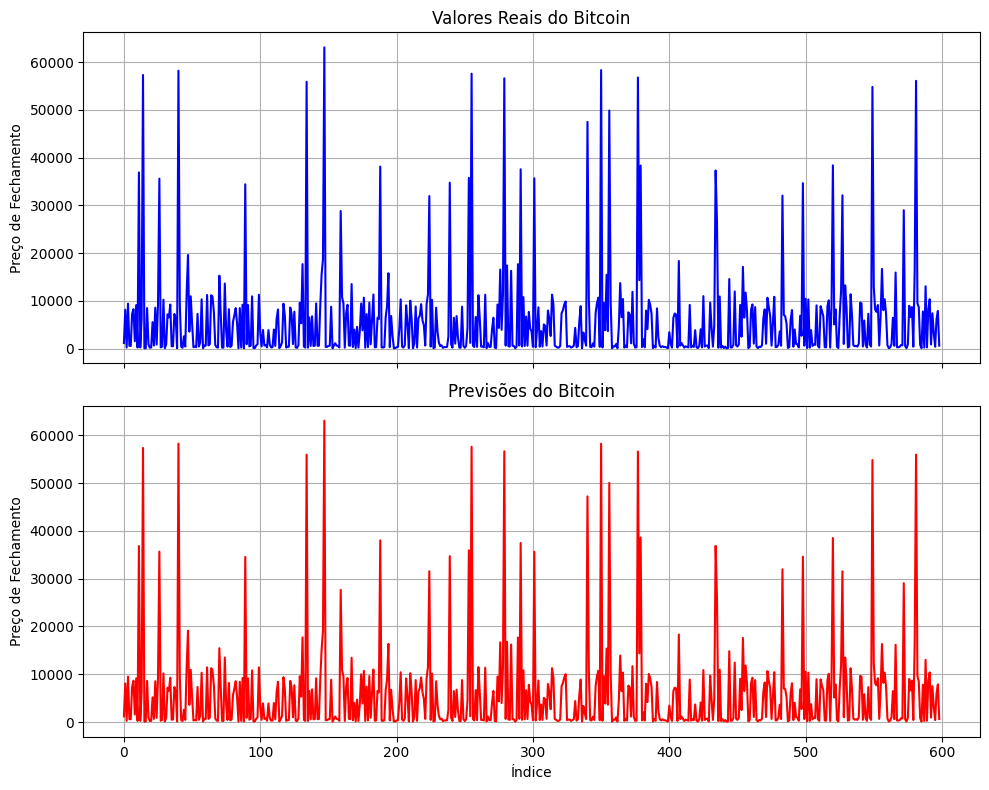

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Valores reais
ax[0].plot(y_test.values, label='Valores Reais', color='blue')
ax[0].set_title('Valores Reais do Bitcoin')
ax[0].set_ylabel('Preço de Fechamento')
ax[0].grid(True)

# Previsões
ax[1].plot(y_pred, label='Previsões', color='red')
ax[1].set_title('Previsões do Bitcoin')
ax[1].set_xlabel('Índice')
ax[1].set_ylabel('Preço de Fechamento')
ax[1].grid(True)

plt.tight_layout()
plt.show()

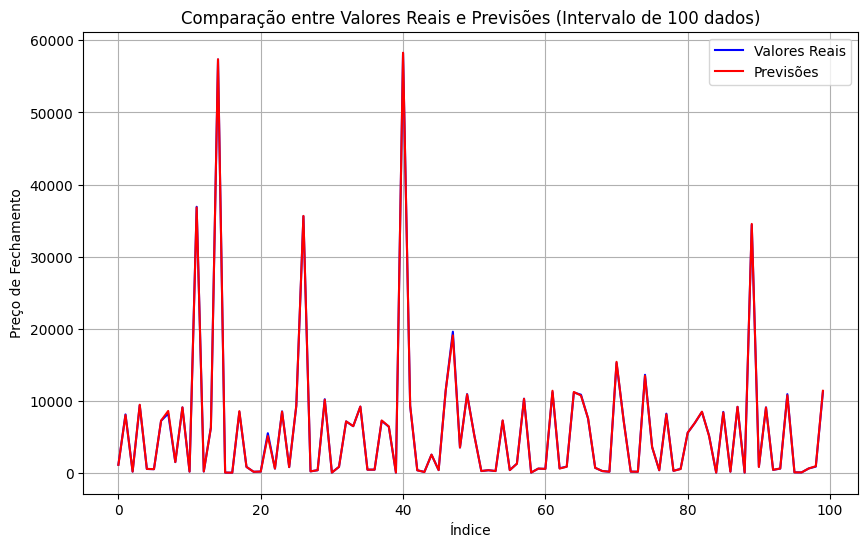

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Valores Reais', color='blue')
plt.plot(y_pred[:100], label='Previsões', color='red')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação entre Valores Reais e Previsões (Intervalo de 100 dados)')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Tuning do Modelo

In [22]:
from sklearn.model_selection import GridSearchCV

# Parâmetros para ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instanciando o GridSearch
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Rodando o GridSearch
grid_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_search.best_params_}')

# Avaliando o melhor modelo
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Recalculando RMSE
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f'RMSE do modelo aprimorado: {rmse_best}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   3.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV]

In [31]:
# EOS e Solana

In [24]:
eos_df = pd.read_csv('../data/raw/coin_EOS.csv')
sol_df = pd.read_csv('../data/raw/coin_Solana.csv')

eos_df['Date'] = pd.to_datetime(eos_df['Date'])
sol_df['Date'] = pd.to_datetime(sol_df['Date'])

# Preprocessamento semelhante ao Bitcoin
# Excluindo as linhas com valores ausentes e formatando os dados adequadamente
eos_df = eos_df[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']].dropna()
sol_df = sol_df[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']].dropna()


In [25]:
# Separando as features e o target para EOS
X_eos = eos_df[['High', 'Low', 'Open', 'Volume', 'Marketcap']]
y_eos = eos_df['Close']

# Separando as features e o target para Solana
X_sol = sol_df[['High', 'Low', 'Open', 'Volume', 'Marketcap']]
y_sol = sol_df['Close']

In [26]:
# EOS: 80% treino, 20% teste
X_train_eos, X_test_eos, y_train_eos, y_test_eos = train_test_split(X_eos, y_eos, test_size=0.2, random_state=42)

# Solana: 80% treino, 20% teste
X_train_sol, X_test_sol, y_train_sol, y_test_sol = train_test_split(X_sol, y_sol, test_size=0.2, random_state=42)

In [27]:
# EOS
rf_model_eos = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf_model_eos.fit(X_train_eos, y_train_eos)

# Solana
rf_model_sol = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf_model_sol.fit(X_train_sol, y_train_sol)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [28]:
# Previsões e avaliação para EOS
y_pred_eos = rf_model_eos.predict(X_test_eos)
mse_eos = mean_squared_error(y_test_eos, y_pred_eos)
rmse_eos = np.sqrt(mse_eos)
print(f'RMSE para EOS: {rmse_eos}')

# Previsões e avaliação para Solana
y_pred_sol = rf_model_sol.predict(X_test_sol)
mse_sol = mean_squared_error(y_test_sol, y_pred_sol)
rmse_sol = np.sqrt(mse_sol)
print(f'RMSE para Solana: {rmse_sol}')

RMSE para EOS: 0.26541286290016514
RMSE para Solana: 0.3199100955117273


In [29]:
# EOS: GridSearch para otimização dos hiperparâmetros
grid_search_eos = GridSearchCV(estimator=rf_model_eos, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_eos.fit(X_train_eos, y_train_eos)

# Solana: GridSearch para otimização dos hiperparâmetros
grid_search_sol = GridSearchCV(estimator=rf_model_sol, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_sol.fit(X_train_sol, y_train_sol)

# Melhor modelo e avaliação para EOS
best_rf_model_eos = grid_search_eos.best_estimator_
y_pred_best_eos = best_rf_model_eos.predict(X_test_eos)
rmse_best_eos = np.sqrt(mean_squared_error(y_test_eos, y_pred_best_eos))
print(f'RMSE do modelo aprimorado para EOS: {rmse_best_eos}')

# Melhor modelo e avaliação para Solana
best_rf_model_sol = grid_search_sol.best_estimator_
y_pred_best_sol = best_rf_model_sol.predict(X_test_sol)
rmse_best_sol = np.sqrt(mean_squared_error(y_test_sol, y_pred_best_sol))
print(f'RMSE do modelo aprimorado para Solana: {rmse_best_sol}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=None, 

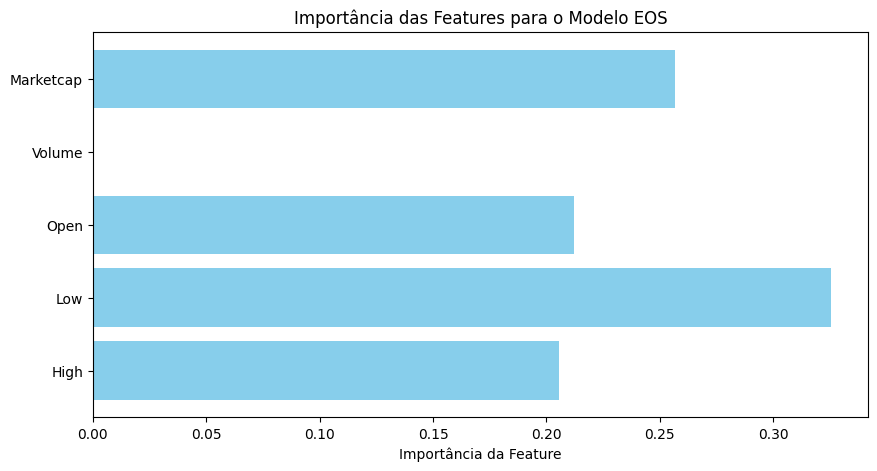

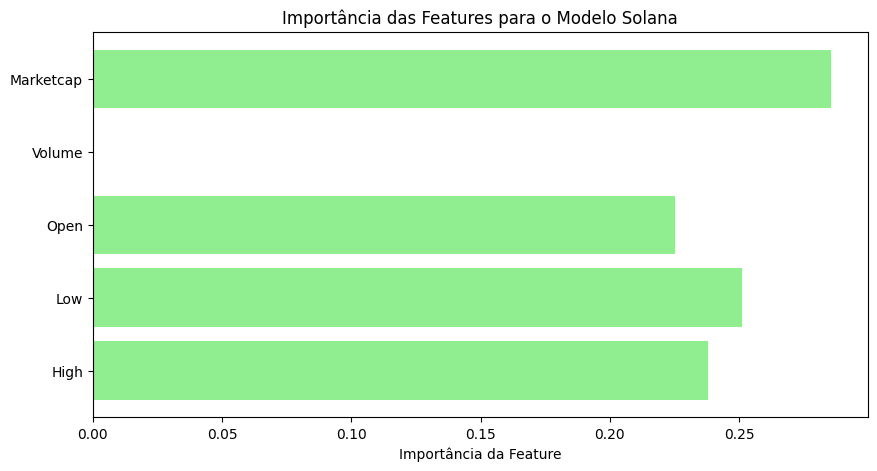

In [30]:
importances = rf_model.feature_importances_
feature_names = X_eos.columns

# EOS
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importância da Feature')
plt.title('Importância das Features para o Modelo EOS')
plt.show()

# Solana
importances_sol = rf_model_sol.feature_importances_

plt.figure(figsize=(10, 5))
plt.barh(X_sol.columns, importances_sol, color='lightgreen')
plt.xlabel('Importância da Feature')
plt.title('Importância das Features para o Modelo Solana')
plt.show()

In [31]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']